In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Read csv file
df_hotels=pd.read_csv("hotels.csv")

In [6]:
#Assign random id to each record
#df_hotels[id]=np.random.randint(1,119391)
df_hotels['ID'] = np.random.randint(1, 119391, size=len(df_hotels))

In [7]:
df_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,ID
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,59585
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,15143
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,35359
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,18916
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,99413


**Task 1: Data Overview:**

1. Display dataypes


In [8]:
df_hotels.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


Number of missing values

In [9]:
df_hotels.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Percentage of missing values

In [10]:
df_hotels.isnull().mean()*100

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


No. of unique values

In [11]:
df_hotels.nunique()

,0
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14


**Task 2 Reservation Cancellation Status**

In [12]:
df_hotels['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


In [13]:
print(f' percentage of canceled bookings: {(df_hotels["is_canceled"]==1).mean()*100}')
print(f' percentage of bookings not canceled:{(df_hotels["is_canceled"]==0).mean()*100}')

 percentage of canceled bookings: 37.041628277075134
 percentage of bookings not canceled:62.958371722924866


([<matplotlib.patches.Wedge at 0x78fb9d58a050>,
 [Text(-0.4355420892185129, 1.0101005338673836, 'not cancelled'),
  Text(0.43554205711094246, -1.0101005477117457, 'cancelled')],
 [Text(-0.237568412301007, 0.5509639275640273, '63.0%'),
  Text(0.23756839478778674, -0.5509639351154977, '37.0%')])

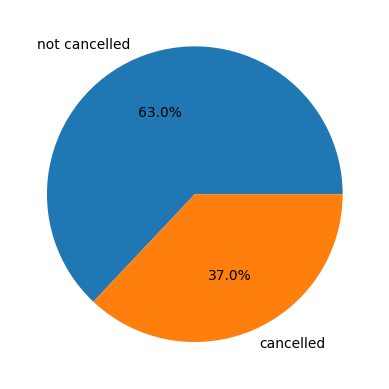

In [14]:
plt.pie(df_hotels['is_canceled'].value_counts(),labels=['not cancelled','cancelled'],autopct='%1.1f%%')

**Task 3: Cancellation Percentages by Hotel Type:**

a)The percentage of canceled reservations specifically for "City Hotel.


In [15]:
city_total = df_hotels[df_hotels['hotel'] == 'City Hotel'].shape[0]
city_canceled = df_hotels[(df_hotels['hotel'] == 'City Hotel') & (df_hotels['is_canceled'] == 1)].shape[0]
city_cancel_percent = (city_canceled / city_total) * 100

In [16]:
city_cancel_percent

41.72696331778646

b)The percentage of canceled reservations specifically for "Resort Hotel

In [17]:

# Total and canceled bookings for Resort Hotel
resort_total = df_hotels[df_hotels['hotel'] == 'Resort Hotel'].shape[0]
resort_canceled = df_hotels[(df_hotels['hotel'] == 'Resort Hotel') & (df_hotels['is_canceled'] == 1)].shape[0]
resort_cancel_percent = (resort_canceled / resort_total) * 100

In [18]:
resort_cancel_percent

27.763354967548675

City Hotel has maximum cancellation of 41.72% compared to resort hotels 27.76%

**Task 4: Filter for Non-Cancelled Reservations:**

Create a new Pandas DataFrame named df_checkout. This DataFrame should contain only the rows from the original df_hotels DataFrame where the is_canceled column is equal to 0 (representing non-canceled reservations).

In [19]:
df_checkout=df_hotels[df_hotels['is_canceled']==0]
df_checkout.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,ID
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,59585
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,15143
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,35359
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,18916
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,99413


**Task 5: Monthly Reservation Analysis:**

5. a)Group the df_checkout DataFrame by hotel type and arrival_date_month and display the number of reservations for each combination.

In [20]:
# Group by hotel and arrival month, then get the size of each group
grouped_data = df_checkout.groupby(['hotel', 'arrival_date_month']).size()

5.b) Based on the grouped data from part (a), identify the month with the highest number of reservations for both "City Hotel" and "Resort Hotel." Conclude whether the monthly trend of reservations is similar for both hotel types

In [21]:
grouped_data

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September             2102
dtype: int64

In [22]:

# Get the month with the highest reservations for City Hotel
city_hotel_max_month = grouped_data.loc['City Hotel'].idxmax()

# Get the month with the highest reservations for Resort Hotel
resort_hotel_max_month = grouped_data.loc['Resort Hotel'].idxmax()

print(f"City Hotel: Month with highest reservations - {city_hotel_max_month}")
print(f"Resort Hotel: Month with highest reservations - {resort_hotel_max_month}")

City Hotel: Month with highest reservations - August
Resort Hotel: Month with highest reservations - August


the monthly trend of reservations is similar for both hotel types.

5.c)Create a new numerical column representing the arrival_date_month (e.g., January = 1, February = 2, etc.). Re-display the grouped data from part (a) using this numerical month representation. Subsequently, create a visualization (e.g., a line plot or bar chart) showing the number of reservations per numerical month for each hotel type.

In [23]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Create a new numerical month column
df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(month_mapping)

<ipython-input-23-15ac3cc7c841>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(month_mapping)


In [24]:
# Group by hotel and numerical arrival month
grouped_data_num = df_checkout.groupby(['hotel', 'arrival_date_month_num']).size()

# Display the grouped data
print(grouped_data_num)

hotel         arrival_date_month_num
City Hotel    1                         2254
              2                         3064
              3                         4072
              4                         4015
              5                         4579
              6                         4366
              7                         4782
              8                         5381
              9                         4290
              10                        4337
              11                        2696
              12                        2392
Resort Hotel  1                         1868
              2                         2308
              3                         2573
              4                         2550
              5                         2535
              6                         2038
              7                         3137
              8                         3257
              9                         2102
              10  

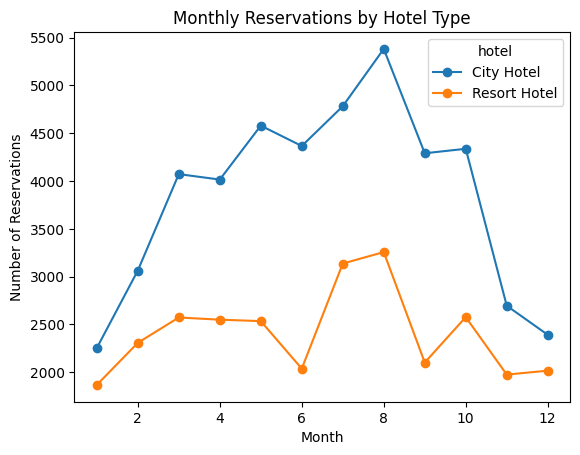

In [25]:
# Create a line plot
grouped_data_num.unstack('hotel').plot(kind='line', marker='o')
plt.title('Monthly Reservations by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.show()

**Task 6: Arrival Date Column Creation**

a) Create a new column named arrival_date in the df_checkout DataFrame. This column should be formed by concatenating the arrival_date_year, the numerical representation of arrival_date_month (ensuring it's formatted with two digits, e.g., '01' for January), and the arrival_date_day_of_month (also ensuring two-digit formatting). Use a consistent separator (e.g., '-') between the year, month, and day.

In [26]:
df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month_num'].astype(str).str.zfill(2)
df_checkout['arrival_date_day_of_month'] = df_checkout['arrival_date_day_of_month'].astype(str).str.zfill(2)

<ipython-input-26-a82b922635ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month_num'].astype(str).str.zfill(2)
<ipython-input-26-a82b922635ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_day_of_month'] = df_checkout['arrival_date_day_of_month'].astype(str).str.zfill(2)


In [27]:
df_checkout['arrival_date'] = df_checkout['arrival_date_year'].astype(str) + '-' + \
                                    df_checkout['arrival_date_month_num'] + '-' + \
                                    df_checkout['arrival_date_day_of_month']

<ipython-input-27-3d9dd843d8a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = df_checkout['arrival_date_year'].astype(str) + '-' + \


In [28]:
df_checkout['arrival_date']

,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01
...,...
119385,2017-08-30
119386,2017-08-31
119387,2017-08-31
119388,2017-08-31


b) Convert the newly created arrival_date column to the datetime data type.

In [29]:
df_checkout['arrival_date']=pd.to_datetime(df_checkout['arrival_date'])

<ipython-input-29-08efbf44d95c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date']=pd.to_datetime(df_checkout['arrival_date'])


In [83]:
df_checkout.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,object
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


**Task 7: Daily and Weekly Reservation Trends**

a) A DataFrame named df_daily_reservation that shows the total number of reservations for each unique arrival date (derived from the arrival_date column created in the previous step).


In [31]:
df_daily_reservation=df_checkout.groupby('arrival_date').size()
df_daily_reservation

,0
arrival_date,
2015-07-01,103
2015-07-02,36
2015-07-03,37
2015-07-04,45
2015-07-05,37
...,...
2017-08-27,125
2017-08-28,147
2017-08-29,81


b) A DataFrame named df_avg_daily_reservation_per_week that calculates and displays the average number of daily reservations for each week of the year. You may need to extract the week number from the arrival_date column

In [32]:
df_checkout['week_number'] = df_checkout['arrival_date'].dt.isocalendar().week

<ipython-input-32-7f5254870741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['week_number'] = df_checkout['arrival_date'].dt.isocalendar().week


In [33]:
df_avg_daily_reservation_per_week=df_checkout.groupby('week_number').count()/7
df_avg_daily_reservation_per_week

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,ID,arrival_date_month_num,arrival_date
week_number,,,,,,,,,,,,,,,,,,,,,
1,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
2,121.571429,121.571429,121.571429,121.571429,121.571429,121.571429,121.571429,121.571429,121.571429,121.571429,...,121.571429,121.571429,121.571429,121.571429,121.571429,121.571429,121.571429,121.571429,121.571429,121.571429
3,149.428571,149.428571,149.428571,149.428571,149.428571,149.428571,149.428571,149.428571,149.428571,149.428571,...,149.428571,149.428571,149.428571,149.428571,149.428571,149.428571,149.428571,149.428571,149.428571,149.428571
4,137.428571,137.428571,137.428571,137.428571,137.428571,137.428571,137.428571,137.428571,137.428571,137.428571,...,137.428571,137.428571,137.428571,137.428571,137.428571,137.428571,137.428571,137.428571,137.428571,137.428571
5,168.571429,168.571429,168.571429,168.571429,168.571429,168.571429,168.571429,168.571429,168.571429,168.571429,...,168.571429,168.571429,168.571429,168.571429,168.571429,168.571429,168.571429,168.571429,168.571429,168.571429
6,178.285714,178.285714,178.285714,178.285714,178.285714,178.285714,178.285714,178.285714,178.285714,178.285714,...,178.285714,178.285714,178.285714,178.285714,178.285714,178.285714,178.285714,178.285714,178.285714,178.285714
7,192.428571,192.428571,192.428571,192.428571,192.428571,192.428571,192.428571,192.428571,192.428571,192.428571,...,192.428571,192.428571,192.428571,192.428571,192.428571,192.428571,192.428571,192.428571,192.428571,192.428571
8,217.142857,217.142857,217.142857,217.142857,217.142857,217.142857,217.142857,217.142857,217.142857,217.142857,...,217.142857,217.142857,217.142857,217.142857,217.142857,217.142857,217.142857,217.142857,217.142857,217.142857
9,195.857143,195.857143,195.857143,195.857143,195.857143,195.857143,195.857143,195.857143,195.857143,195.857143,...,195.857143,195.857143,195.857143,195.857143,195.857143,195.857143,195.857143,195.857143,195.857143,195.857143


**Task 8:Average Daily Rate (ADR) Analysis**

a) Calculate the average Average Daily Rate (ADR) by grouping the df_checkout DataFrame by both hotel type and customer_type.

In [34]:
avg_daily_rate=df_checkout.groupby(['hotel','customer_type'])['adr'].mean()
avg_daily_rate

hotel         customer_type  
City Hotel    Contract           108.929255
              Group               87.398712
              Transient          110.423280
              Transient-Party     93.705007
Resort Hotel  Contract            78.581674
              Group               77.306575
              Transient           96.001928
              Transient-Party     77.204010
Name: adr, dtype: float64

b) For each hotel type ("City Hotel" and "Resort Hotel"), identify the customer_type that has the highest average ADR.

In [35]:
for hotel in avg_daily_rate.index.levels[0]:
    max_customer_type = avg_daily_rate.loc[hotel].idxmax()
    print(f"For {hotel}, the customer type with the highest average ADR is: {max_customer_type}")

For City Hotel, the customer type with the highest average ADR is: Transient
For Resort Hotel, the customer type with the highest average ADR is: Transient


Visualize the distribution of ADR for each hotel type, further segmented by customer_type. A boxplot would be a suitable visualization for this purpose.

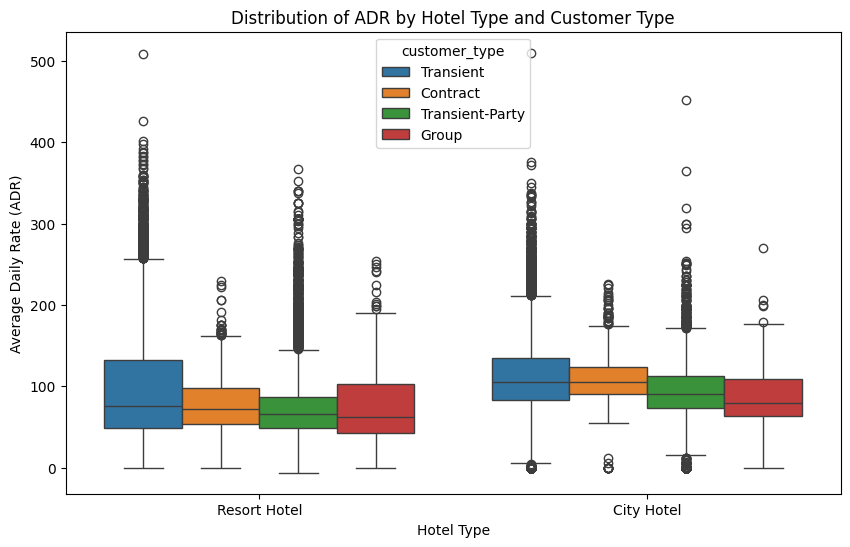

In [36]:

# Assuming your DataFrame is named 'df_checkout'
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='hotel', y='adr', hue='customer_type', data=df_checkout)
plt.title('Distribution of ADR by Hotel Type and Customer Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

**Task 9:Top Countries by Reservations**

In [47]:
df_country=pd.read_csv("countries_codes_and_coordinates.csv")

In [48]:
df_country.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


In [49]:
df_country=df_country[['Alpha-3 code', 'Country']]

In [50]:
df_country

,Alpha-3 code,Country
0,"""AFG""",Afghanistan
1,"""ALB""",Albania
2,"""DZA""",Algeria
3,"""ASM""",American Samoa
4,"""AND""",Andorra
...,...,...
251,"""WLF""",Wallis and Futuna
252,"""ESH""",Western Sahara
253,"""YEM""",Yemen
254,"""ZMB""",Zambia


In [51]:
df_country=df_country.rename(columns={'Alpha-3 code': 'country', 'Country': 'country_name'})

In [52]:
df_country['country'] = df_country['country'].str.replace('"', '', regex=False)


In [57]:
df_country['country'] = df_country['country'].str.replace(' ', '')

In [60]:
df_country['country'][0]

'AFG'

In [61]:
prt_present = df_country['country'].isin(['PRT']).any()

print(f"Is 'PRT' present in df_country['country']: {prt_present}")

Is 'PRT' present in df_country['country']: True


In [62]:
df_merged=pd.merge(df_checkout,df_country,on='country',how='left')

In [63]:
df_merged

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,ID,arrival_date_month_num,arrival_date,week_number,country_name
0,Resort Hotel,0,342,2015,July,27,01,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,59585,07,2015-07-01,27,Portugal
1,Resort Hotel,0,737,2015,July,27,01,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,15143,07,2015-07-01,27,Portugal
2,Resort Hotel,0,7,2015,July,27,01,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,35359,07,2015-07-01,27,United Kingdom
3,Resort Hotel,0,13,2015,July,27,01,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,18916,07,2015-07-01,27,United Kingdom
4,Resort Hotel,0,14,2015,July,27,01,0,2,2,...,98.00,0,1,Check-Out,2015-07-03,99413,07,2015-07-01,27,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75712,City Hotel,0,23,2017,August,35,30,2,5,2,...,96.14,0,0,Check-Out,2017-09-06,8297,08,2017-08-30,35,Belgium
75713,City Hotel,0,102,2017,August,35,31,2,5,3,...,225.43,0,2,Check-Out,2017-09-07,43446,08,2017-08-31,35,France
75714,City Hotel,0,34,2017,August,35,31,2,5,2,...,157.71,0,4,Check-Out,2017-09-07,96815,08,2017-08-31,35,Germany
75715,City Hotel,0,109,2017,August,35,31,2,5,2,...,104.40,0,0,Check-Out,2017-09-07,53080,08,2017-08-31,35,United Kingdom


Determine the top 10 countries with the highest number of non-canceled reservations. Display these top 10 countries and their corresponding reservation counts.

In [70]:
top10countries=df_merged[df_merged['is_canceled'].values==0].groupby('country_name').size().sort_values(ascending=False).head(10)

In [71]:
top10countries

,0
country_name,
Portugal,21071
United Kingdom,9676
France,8481
Spain,6391
Germany,6069
Ireland,2543
Italy,2433
Belgium,1868
Netherlands,1717


Create a visualization (e.g., a bar chart) to represent these top 10 countries by the number of reservations.

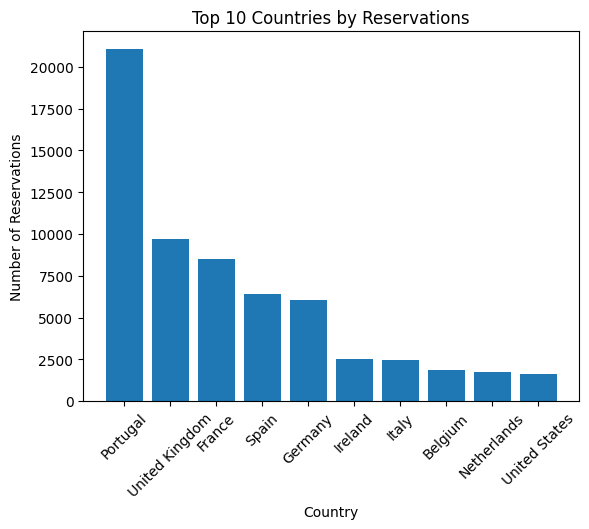

In [73]:
plt.bar(top10countries.index, top10countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Reservations')
plt.title('Top 10 Countries by Reservations')
plt.xticks(rotation=45)
plt.show()

**Task 10: Guest Analysis**

a) Create a new column named total_guest in the df_checkout DataFrame by summing the values from the adults, children, and babies columns for each reservation. Calculate and report the average number of total guests per reservation.


In [75]:
df_checkout['total_guest']=df_checkout['adults']+df_checkout['children']+df_checkout['babies']

<ipython-input-75-6cce5f7e633c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest']=df_checkout['adults']+df_checkout['children']+df_checkout['babies']


In [76]:
df_checkout.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,ID,arrival_date_month_num,arrival_date,week_number,total_guest
0,Resort Hotel,0,342,2015,July,27,01,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,59585,07,2015-07-01,27,2.0
1,Resort Hotel,0,737,2015,July,27,01,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,15143,07,2015-07-01,27,2.0
2,Resort Hotel,0,7,2015,July,27,01,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,35359,07,2015-07-01,27,1.0
3,Resort Hotel,0,13,2015,July,27,01,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,18916,07,2015-07-01,27,1.0
4,Resort Hotel,0,14,2015,July,27,01,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,99413,07,2015-07-01,27,2.0


b) Determine the highest number of total guests recorded in a single reservation within the df_checkout DataFrame. Display the entire row of data corresponding to the reservation with this maximum number of guests.

In [79]:

df_checkout[df_checkout['total_guest'] == df_checkout['total_guest'].max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,ID,arrival_date_month_num,arrival_date,week_number,total_guest
46619,City Hotel,0,37,2016,January,3,12,0,2,2,...,84.45,0,1,Check-Out,2016-01-14,26049,01,2016-01-12,2,12.0
